<a href="https://colab.research.google.com/github/Tatsuyuki-Matsuda/EU_M_Math-Repository/blob/main/Chapter8_Ex_Cm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [56]:
import numpy as np
import numpy.random as random
import scipy as sp
from pandas import Series,DataFrame
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline

import sklearn

%precision 3

'%.3f'

In [57]:
import requests, zipfile
import io

url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data'
res = requests.get(url).content

auto = pd.read_csv(io.StringIO(res.decode('utf-8')), header=None)

auto.columns =['symboling','normalized-losses','make','fuel-type' ,'aspiration','num-of-doors',
                            'body-style','drive-wheels','engine-location','wheel-base','length','width','height',
                            'curb-weight','engine-type','num-of-cylinders','engine-size','fuel-system','bore',
                            'stroke','compression-ratio','horsepower','peak-rpm','city-mpg','highway-mpg','price']
      
print('自動車データの形式:{}'.format(auto.shape))

自動車データの形式:(205, 26)


In [58]:
auto.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [59]:
auto = auto[['price','horsepower','width','height']]
auto.isin(['?']).sum()

price         4
horsepower    2
width         0
height        0
dtype: int64

In [60]:
auto = auto.replace('?', np.nan).dropna()
print('自動車データの形式:{}'.format(auto.shape))

自動車データの形式:(199, 4)


In [61]:
print('データ型の確認（型変換前）\n{}\n'.format(auto.dtypes))

データ型の確認（型変換前）
price          object
horsepower     object
width         float64
height        float64
dtype: object



In [62]:
auto = auto.assign(price=pd.to_numeric(auto.price))
auto = auto.assign(horsepower=pd.to_numeric(auto.horsepower))
print('データ型の確認（型変換後）\n{}'.format(auto.dtypes))

データ型の確認（型変換後）
price           int64
horsepower      int64
width         float64
height        float64
dtype: object


In [63]:
auto.corr()

,price,horsepower,width,height
price,1.000000,0.810533,0.753871,0.134990
horsepower,0.810533,1.000000,0.615315,-0.087407
width,0.753871,0.615315,1.000000,0.309223
height,0.134990,-0.087407,0.309223,1.000000


In [64]:
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression

X = auto.drop('price', axis=1)
y = auto['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

model = LinearRegression()
model.fit(X_train,y_train)

print('決定係数(train):{:.3f}'.format(model.score(X_train,y_train)))
print('決定係数(test):{:.3f}'.format(model.score(X_test,y_test)))

決定係数(train):0.733
決定係数(test):0.737


In [65]:
#Ex-01
import requests, zipfile
import io

url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data'
res = requests.get(url).content
auto = pd.read_csv(io.StringIO(res.decode('utf-8')), header=None)
auto.columns =['symboling','normalized-losses','make','fuel-type' ,'aspiration','num-of-doors',
                            'body-style','drive-wheels','engine-location','wheel-base','length','width','height',
                            'curb-weight','engine-type','num-of-cylinders','engine-size','fuel-system','bore',
                            'stroke','compression-ratio','horsepower','peak-rpm','city-mpg','highway-mpg','price']

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

auto = auto[['price','width','engine-size']]
auto = auto.replace('?', np.nan).dropna()
auto.shape

X = auto.drop('price', axis=1)
y = auto['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

model = LinearRegression()
model.fit(X_train,y_train)
print('決定係数(train):{:.3f}'.format(model.score(X_train,y_train)))
print('決定係数(test):{:.3f}'.format(model.score(X_test,y_test)))

決定係数(train):0.783
決定係数(test):0.778


In [66]:
#Ex-02
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify = cancer.target, random_state=0)

model = LogisticRegression()
model.fit(X_train,y_train)
print('正解率(train):{:.3f}'.format(model.score(X_train, y_train)))
print('正解率(test):{:.3f}'.format(model.score(X_test, y_test)))

正解率(train):0.958
正解率(test):0.923


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [67]:
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data'
res = requests.get(url).content

adult = pd.read_csv(io.StringIO(res.decode('utf-8')), header=None)

adult.columns =['age','workclass','fnlwgt','education','education-num','marital-status',
                             'occupation','relationship','race','sex','capital-gain','capital-loss','hours-per-week',
                             'native-country','flg-50K']

print('データの形式:{}'.format(adult.shape))
print('欠損の数:{}'.format(adult.isnull().sum().sum()))

adult.head()

データの形式:(32561, 15)
欠損の数:0


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,flg-50K
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [68]:
adult.groupby('flg-50K').size()

flg-50K
 <=50K    24720
 >50K      7841
dtype: int64

In [69]:
adult['fin_flg'] = adult['flg-50K'].map(lambda x: 1 if x ==' >50K' else 0)
adult.groupby('fin_flg').size()

fin_flg
0    24720
1     7841
dtype: int64

In [70]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X = adult[['age','fnlwgt','education-num','capital-gain','capital-loss']]
y = adult['fin_flg']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

model = LogisticRegression()
model.fit(X_train,y_train)

print('正解率(train):{:.3f}'.format(model.score(X_train, y_train)))
print('正解率(test):{:.3f}'.format(model.score(X_test, y_test)))

正解率(train):0.797
正解率(test):0.798


In [71]:
model.coef_

array([[-1.185e-02, -4.379e-06, -2.774e-03,  3.274e-04,  7.532e-04]])

In [72]:
np.exp(model.coef_)

array([[0.988, 1.   , 0.997, 1.   , 1.001]])

In [73]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X = adult[['age','fnlwgt','education-num','capital-gain','capital-loss']]
y = adult['fin_flg']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

model = LogisticRegression()
model.fit(X_train_std,y_train)

print('正解率(train):{:.3f}'.format(model.score(X_train_std, y_train)))
print('正解率(test):{:.3f}'.format(model.score(X_test_std, y_test)))

正解率(train):0.811
正解率(test):0.810


In [74]:
#Ex-03
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

model = LogisticRegression()
model.fit(X_train_std,y_train)
print('正解率(train):{:.3f}'.format(model.score(X_train_std, y_train)))
print('正解率(test):{:.3f}'.format(model.score(X_test_std, y_test)))

正解率(train):0.811
正解率(test):0.810


In [75]:
#Ex-04
from sklearn.linear_model import LinearRegression, Lasso

X = auto.drop('price', axis=1)
y = auto['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

models = {
    'linear': LinearRegression(),
    'lasso1':  Lasso(alpha=1.0, random_state=0),
    'lasso2':  Lasso(alpha=200.0, random_state=0)
}

scores = {}
for model_name, model in models.items():
    model.fit(X_train,y_train)
    scores[(model_name, 'train')] = model.score(X_train, y_train)
    scores[(model_name, 'test')] = model.score(X_test, y_test)

pd.Series(scores).unstack()

,test,train
lasso1,0.778308,0.783189
lasso2,0.782421,0.782839
linear,0.778292,0.783189


In [76]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split

X = auto.drop('price', axis=1)
y = auto['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

linear = LinearRegression()
ridge = Ridge(random_state=0)

for model in [linear, ridge]:
    model.fit(X_train,y_train)
    print('{}(train):{:.6f}'.format(model.__class__.__name__ , model.score(X_train,y_train)))
    print('{}(test):{:.6f}'.format(model.__class__.__name__ , model.score(X_test,y_test)))

LinearRegression(train):0.783189
LinearRegression(test):0.778292
Ridge(train):0.783187
Ridge(test):0.778592


In [77]:
#Ex-05
from sklearn.tree import  DecisionTreeClassifier

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify = cancer.target, random_state=66)

models = {
    'tree1': DecisionTreeClassifier(criterion='entropy', max_depth=3,random_state=0),
    'tree2': DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=0),
    'tree3': DecisionTreeClassifier(criterion='entropy', max_depth=10, random_state=0),
    'tree4': DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0),
    'tree5': DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=0),
    'tree6': DecisionTreeClassifier(criterion='gini', max_depth=10, random_state=0)
}

scores = {}
for model_name, model in models.items():
    model.fit(X_train,y_train)
    scores[(model_name, 'train')] = model.score(X_train, y_train)
    scores[(model_name, 'test')] = model.score(X_test, y_test)

pd.Series(scores).unstack()

,test,train
tree1,0.930070,0.971831
tree2,0.902098,0.997653
tree3,0.902098,1.000000
tree4,0.923077,0.974178
tree5,0.895105,1.000000
tree6,0.895105,1.000000


In [78]:
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data'
res = requests.get(url).content

mushroom = pd.read_csv(io.StringIO(res.decode('utf-8')), header=None)

mushroom.columns =['classes','cap_shape','cap_surface','cap_color','bruises','odor',
                             'gill_attachment','gill_spacing','gill_size','gill_color','stalk_shape',
                             'stalk_root','stalk_surface_above_ring','stalk_surface_below_ring',
                             'stalk_color_above_ring','stalk_color_below_ring','veil_type','veil_color',
                             'ring_number','ring_type','spore_print_color','population','habitat']

mushroom.head()

,classes,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [79]:
print('データの形式:{}'.format(mushroom.shape))
print('欠損の数:{}'.format(mushroom.isnull().sum().sum()))

データの形式:(8124, 23)
欠損の数:0


In [80]:
mushroom_dummy = pd.get_dummies(mushroom[['gill_color','gill_attachment','odor','cap_color']])
mushroom_dummy.head()

,gill_color_b,gill_color_e,gill_color_g,gill_color_h,gill_color_k,gill_color_n,gill_color_o,gill_color_p,gill_color_r,gill_color_u,...,cap_color_b,cap_color_c,cap_color_e,cap_color_g,cap_color_n,cap_color_p,cap_color_r,cap_color_u,cap_color_w,cap_color_y
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [81]:
mushroom_dummy['flg'] = mushroom['classes'].map(lambda x: 1 if x =='p' else 0)

In [82]:
mushroom_dummy.groupby(['cap_color_c', 'flg'])['flg'].count().unstack()

flg,0,1
cap_color_c,,
0,4176,3904
1,32,12


In [83]:
mushroom_dummy.groupby(['gill_color_b', 'flg'])['flg'].count().unstack()

flg,0,1
gill_color_b,,
0,4208.0,2188.0
1,NaN,1728.0


In [84]:
- (0.5 * np.log2(0.5) + 0.5 * np.log2(0.5))

1.000

In [85]:
- (0.001 * np.log2(0.001) + 0.999 * np.log2(0.999))

0.011

In [86]:
def calc_entropy(p):
    return - (p * np.log2(p) + (1 - p) *  np.log2(1 - p) )

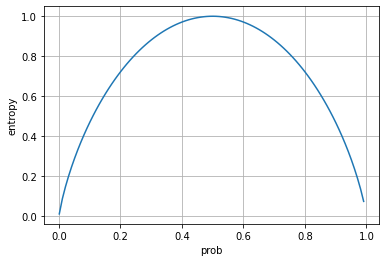

In [87]:
p = np.arange(0.001, 0.999, 0.01)

plt.plot(p, calc_entropy(p)) 
plt.xlabel('prob')
plt.ylabel('entropy')
plt.grid(True)

In [88]:
mushroom_dummy.groupby('flg')['flg'].count()

flg
0    4208
1    3916
Name: flg, dtype: int64

In [89]:
entropy_init = - (0.518 * np.log2(0.518) + 0.482 * np.log2(0.482))
print('毒キノコデータのエントロピーの初期値: {:.3f}'.format(entropy_init))

毒キノコデータのエントロピーの初期値: 0.999


In [90]:
mushroom_dummy.groupby(['cap_color_c', 'flg'])['flg'].count().unstack()

flg,0,1
cap_color_c,,
0,4176,3904
1,32,12


In [91]:
p1 = 4176 / (4176 + 3904)
p2 = 1 - p1
entropy_c0 = -(p1*np.log2(p1)+p2*np.log2(p2))
print('entropy_c0: {:.3f}'.format(entropy_c0))

entropy_c0: 0.999


In [92]:
p1 = 32/(32+12)
p2 = 1 - p1
entropy_c1 = -(p1*np.log2(p1)+p2*np.log2(p2))
print('entropy_c1: {:.3f}'.format(entropy_c1))

entropy_c1: 0.845


In [93]:
entropy_after = (4176+3904)/8124*entropy_c0 + (32+12)/8124*entropy_c1
print('データ分割後の平均エントロピー: {:.3f}'.format(entropy_after))

データ分割後の平均エントロピー: 0.998


In [94]:
print('変数cap_colorの分割によって得られる情報利得: {:.3f}'.format(entropy_init - entropy_after))

変数cap_colorの分割によって得られる情報利得: 0.001


In [95]:
mushroom_dummy.groupby(['gill_color_b', 'flg'])['flg'].count().unstack()

flg,0,1
gill_color_b,,
0,4208.0,2188.0
1,NaN,1728.0


In [96]:
p1 = 4208/(4208+2188)
p2 = 1 - p1
entropy_b0 = - (p1*np.log2(p1) + p2*np.log2(p2))

# gill_colorがbである場合のエントロピー
p1 = 0/(0+1728)
p2 = 1 - p1
entropy_b1 = - (p2*np.log2(p2))

entropy_after = (4208+2188)/8124*entropy_b0 + (0+1728)/8124*entropy_b1
print('変数gill_colorの分割によって得られる情報利得: {:.3f}'.format(entropy_init - entropy_after))

変数gill_colorの分割によって得られる情報利得: 0.269


In [97]:
from sklearn.tree import  DecisionTreeClassifier
from sklearn.model_selection import train_test_split

X = mushroom_dummy.drop('flg', axis=1)
y = mushroom_dummy['flg']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

model = DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=0)
model.fit(X_train,y_train)

print('正解率(train):{:.3f}'.format(model.score(X_train, y_train)))
print('正解率(test):{:.3f}'.format(model.score(X_test, y_test)))

正解率(train):0.991
正解率(test):0.992


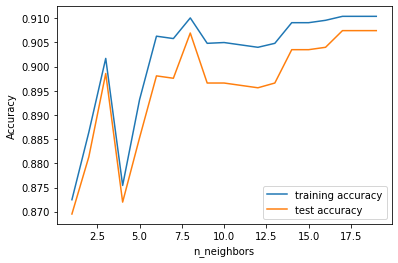

In [98]:
#Ex-06
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data'
res = requests.get(url).content

mush = pd.read_csv(io.StringIO(res.decode('utf-8')), header=None)
mush.columns =[
    'classes','cap_shape','cap_surface','cap_color','odor','bruises',
    'gill_attachment','gill_spacing','gill_size','gill_color','stalk_shape',
    'stalk_root','stalk_surface_above_ring','stalk_surface_below_ring',
    'stalk_color_above_ring','stalk_color_below_ring','veil_type','veil_color',
    'ring_number','ring_type','spore_print_color','population','habitat'
]

mush_dummy = pd.get_dummies(mush[['gill_color','gill_attachment','odor','cap_color']])
mush_dummy['flg'] = mush['classes'].map(lambda x: 1 if x =='p' else 0)

from sklearn.neighbors import  KNeighborsClassifier

X = mush_dummy.drop('flg', axis=1)
y = mush_dummy['flg']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=50)

training_accuracy = []
test_accuracy =[]
neighbors_settings = range(1,20)
for n_neighbors in neighbors_settings:
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train,y_train)
    training_accuracy.append(clf.score(X_train, y_train))
    test_accuracy.append(clf.score(X_test, y_test))
    
plt.plot(neighbors_settings, training_accuracy, label='training accuracy')
plt.plot(neighbors_settings, test_accuracy, label='test accuracy')
plt.ylabel('Accuracy')
plt.xlabel('n_neighbors')
plt.legend()

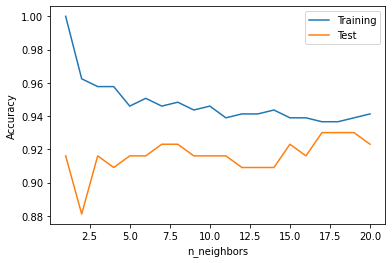

In [99]:
from sklearn.datasets import load_breast_cancer
from sklearn.neighbors import  KNeighborsClassifier
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify = cancer.target, random_state=0)

training_accuracy = []
test_accuracy =[]

for n_neighbors in range(1,21):
    model = KNeighborsClassifier(n_neighbors=n_neighbors)
    model.fit(X_train,y_train)
    training_accuracy.append(model.score(X_train, y_train))
    test_accuracy.append(model.score(X_test, y_test))

plt.plot(range(1,21), training_accuracy, label='Training')
plt.plot(range(1,21), test_accuracy, label='Test')
plt.ylabel('Accuracy')
plt.xlabel('n_neighbors')
plt.legend()

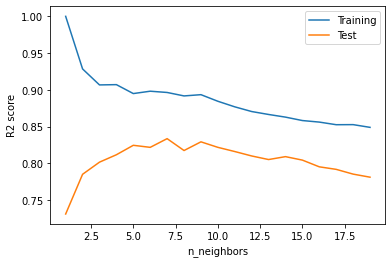

In [100]:
#Ex-07
import requests, zipfile
from io import StringIO
import io

url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00356/student.zip'

r = requests.get(url, stream=True)

z = zipfile.ZipFile(io.BytesIO(r.content))
z.extractall()

import pandas as pd
student = pd.read_csv('student-mat.csv', sep=';')
X = student.loc[:, 
    ['age','Medu','Fedu','traveltime','studytime',
     'failures','famrel','freetime','goout','Dalc','Walc',
     'absences','G1','G2']].values

from sklearn.neighbors import  KNeighborsRegressor

X_train, X_test, y_train, y_test = train_test_split(
    X, student.G3, random_state=0)

scores_train = []
scores_test =[]
neighbors_settings = range(1, 20)
for n_neighbors in neighbors_settings:
    model = KNeighborsRegressor(n_neighbors=n_neighbors)
    model.fit(X_train, y_train)
    scores_train.append(model.score(X_train, y_train))
    scores_test.append(model.score(X_test, y_test))
    
plt.plot(neighbors_settings, scores_train,label='Training')
plt.plot(neighbors_settings, scores_test,label='Test')
plt.ylabel('R2 score')
plt.xlabel('n_neighbors')
plt.legend()

In [101]:
#Ex-08
student = pd.read_csv('student-mat.csv', sep=';')
X = student.loc[:, ['age','Medu','Fedu','traveltime','studytime'
                              ,'failures','famrel','freetime','goout','Dalc','Walc'
                              ,'absences','G1','G2']].values

from sklearn.svm import SVC

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify = cancer.target, random_state=50)

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

model = SVC(kernel='rbf', random_state=0, C=2)
model.fit(X_train_std,y_train)
print('正解率(train):{:.3f}'.format(model.score(X_train_std, y_train)))
print('正解率(test):{:.3f}'.format(model.score(X_test_std, y_test)))

正解率(train):0.988
正解率(test):0.986


In [102]:
#Ex-08
from sklearn.svm import SVC

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify = cancer.target, random_state=50)

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

model = SVC(kernel='rbf', random_state=0, C=2)
model.fit(X_train_std,y_train)
print('正解率(train):{:.3f}'.format(model.score(X_train_std, y_train)))
print('正解率(test):{:.3f}'.format(model.score(X_test_std, y_test)))

正解率(train):0.988
正解率(test):0.986


# 8章 総合問題
Cm-01\
・回帰\
目的変数が株価などの数値を取る場合の教師あり学習の手法\
データ間の関係性を一定の数式・公式でどれくらい説明できるかを調べる\
https://aiacademy.jp/media/?p=236 \
・分類\
目的変数が「男性・女性」などのカテゴリになる場合の教師あり学習の手法\
データを学習して、新たな入力に対する出力のラベルを予測する\
https://www.codexa.net/scikit-learn-intro/ \
・教師あり学習\
訓練データを与えて、そこに含まれる目的変数(正解データ)を予測するためのモデルを構築する手法\
データを与えてそのデータの規則性を学習させる\
https://www.tech-teacher.jp/blog/python_supervisedlearning/ \
・重回帰分析\
説明変数が1つではなく複数ある場合の教師あり学習のアルゴリズム（手法）\
回帰係数は予測値と目的変数の2乗誤差が最小になるように推定される\
複数の数値からゴールとなる1つの数値(獲得契約件)を説明する\
https://aiacademy.jp/media/?p=236 \
・ロジスティック回帰分析\
目的変数が数値ではなく、「する」「しない」といった、カテゴリの形になっている変数(カテゴリ変数)(交差エントロピー誤差関数)を扱うアルゴリズム\
よって「回帰」ではなく「分類」を扱うアルゴリズム\
説明変数を入力した際、ロジスティック関数をもとに発生確率を求め、最終的に0か1を返す\
https://di-acc2.com/analytics/ai/16440/#index_id0 \
・正則化\
一般的に、モデルの複雑さを低減するための工夫全般を指す用語\
モデルの複雑さを制限し、モデルの複雑さとパフォーマンスのバランスをとることができる\
https://www.codetd.com/ja/article/12814811#3__15 \
・リッジ回帰\
最小二乗法の式にL2ノルム（ユーグリッド距離）の2乗を用いた正則化項を加えた回帰分析\
過学習を抑えることができる\
https://aiacademy.jp/texts/show/?id=215 \
https://cochineal19.hatenablog.com/entry/2021/05/16/133121 \
・ラッソ回帰\
最小二乗法の式にL1ノルム（マンハッタン距離）を用いた正則化項を加えた回帰分析\
不要なパラメータ(次元や特徴量)を削ることができる\
https://aiacademy.jp/texts/show/?id=215 \
https://cochineal19.hatenablog.com/entry/2021/05/16/133121 \
・決定木\
データをある条件に従って分割することにより、データの分類または回帰のモデルを作成するアルゴリズム\
ある目的に到達するためにデータの各属性の条件分岐を繰り返してクラス分けする方法のこと\
分類を行う分類木と回帰を行う回帰木を総称して決定木という\
https://qiita.com/renesisu727/items/844648d6c60e578ce944 \
・エントロピー\
確率分布の「乱雑さ」を示す指標のこと\
ある特定の条件下でエントロピーを最大にすることによって、何らかのほしい結果を得る計算手法\
https://www.tcom242242.net/entry/uncategorized/entropy/ \
https://logics-of-blue.com/entropy-model-for-price-setting-with-python/ \
・情報利得\
ある変数を使ってデータを分割したとき、分割の前後でどれだけ不純度(エントロピー)が減少したかを表す指標のこと\
https://qiita.com/y_itoh/items/317beff03e97f17d445f \
・k-NN法\
分類と回帰の両方に用いられるアルゴリズムであるが、主に分類で用いられることが多い\
分類において、ある目的変数が未知のデータが与えられた時、そのデータの目的変数を特殊空間上に近い他のデータの目的変数の多数決で決定する手法\
https://qiita.com/renesisu727/items/e5191a97d3f16a14ebd0 \
・SVM(サポートベクターマシン)\
汎化性能や応用分野の広さから、データ分析の現場でよく用いられる機械学習のアルゴリズムであり、教師あり学習のクラス分類と回帰ができる\
少ない教師データで高い汎化性能を持つことができ、計算も早く過学習も起こしづらい特徴がある\
https://ai-kenkyujo.com/svm/ \
https://qiita.com/kazuki_hayakawa/items/18b7017da9a6f73eba77 \
・ノーフリーランチ\
あらゆる問題を効率よく解けるような“万能”の「教師ありの機械学習モデル」や「探索／最適化のアルゴリズム」などは存在しない（理論上、実現不可能）ということを主張する定理のことである\
https://atmarkit.itmedia.co.jp/ait/articles/2007/17/news020.html \